# Course Code: DS4003 
# Course Name: Principles and Techniques for Data Science 
# Lab Session: 03 - Exploratory Data Analysis

### Some contents of the lab are adapted from UC Berkeley's Data100 course. In this lab, we'll go through a series of EDA tasks on a rental dataset.

## From the Lecutre

### Key Task in EDA
1. **Data Understanding** 
2. **Data Cleaning** 
3. **Pattern Recognition** 
4. Hypothesis Generation 
5. Feature Selection 
6. Feature Engineering 

### Goals of EDA
#### We determine: 
1. **Data Types**: What kinds of data do we have?
2. **Granuality**: How is the resolution of data?
3. **Scope**: How (in)complete are the data?
4. **Temporality**: How are the data situated in time? 
5. **Faithfulness**:How accurately do the data describe the world?


### Some important Imports 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import warnings 
warnings.simplefilter('ignore')
%matplotlib inline

You are given a dataset  containing rental listings data scraped from Craigslist. Craigslist is a popular onlin advertising website.

## Read in Data and Compute Basic Summary Statistics

In [2]:
df = pd.read_csv("craiglist_rental.csv")
df.head()

,Unnamed: 0,id,price,title,body,lat,long,posted,updated,header,file,bedrooms,bath,sqft
0,_eby_apa_d_1-2-mth-free-unfurnished-modern-3bd...,6809166875,6500,$6500 / 3br - 1900ft2 - 1/2 MTH FREE! Unfurnis...,\r\n QR Code Link to This Post\r\n ...,37.894549,-122.263756,2019-02-01T09:54:18-0800,2019-02-05T06:50:49-0800,3BR / 3Ba,_eby_apa_d_1-2-mth-free-unfurnished-modern-3bd...,3,3,1900.0
1,_eby_apa_d_1-bedroom-pet-friendly-building-146...,6817699544,1795,$1795 / 1br - 1 bedroom Pet-friendly Building!...,\r\n QR Code Link to This Post\r\n ...,37.803334,-122.266724,2019-02-12T10:14:49-0800,2019-02-12T10:14:50-0800,1BR / 1Ba,_eby_apa_d_1-bedroom-pet-friendly-building-146...,1,1,NaN
2,_eby_apa_d_1-bedroom-pet-friendly-building-146...,6817715072,1995,$1995 / 1br - 1 bedroom Pet-friendly Building!...,\r\n QR Code Link to This Post\r\n ...,37.803334,-122.266724,2019-02-12T10:29:31-0800,2019-02-12T10:35:29-0800,1BR / 1Ba,_eby_apa_d_1-bedroom-pet-friendly-building-146...,1,1,NaN
3,_eby_apa_d_1-br-1-ba-berkeley-available-now_68...,6817370571,2200,"$2200 / 1br - 1 BR / 1 BA Berkeley, Available ...",\r\n QR Code Link to This Post\r\n ...,37.857026,-122.280080,2019-02-11T22:20:53-0800,2019-02-12T15:28:04-0800,1BR / 1Ba,_eby_apa_d_1-br-1-ba-berkeley-available-now_68...,1,1,NaN
4,_eby_apa_d_1-br-with-parking-near-downtown_681...,6814999655,1950,$1950 / 1br - 500ft2 - 1 br with parking near ...,\r\n QR Code Link to This Post\r\n ...,37.866400,-122.257000,2019-02-08T16:37:38-0800,NaN,1BR / 1Ba,_eby_apa_d_1-br-with-parking-near-downtown_681...,1,1,500.0


## Task: Find out what types of data we have in the dataset.


In [3]:
## YOUR CODE

## The column ```Unnamed: 0```
What is in it? 

In [4]:
item = df.iloc[0]
print(item["Unnamed: 0"])

_eby_apa_d_1-2-mth-free-unfurnished-modern-3bd_6809166875.html


It does contains the html file name published in craiglist. Like ID, this column will have unique values. 
So, we move this column from regular column to index. 

In [5]:
df.index = df['Unnamed: 0']
df = df.drop(columns = 'Unnamed: 0')
df.head()
print(df.index)

Index(['_eby_apa_d_1-2-mth-free-unfurnished-modern-3bd_6809166875.html',
       '_eby_apa_d_1-bedroom-pet-friendly-building-1461_6817699544.html',
       '_eby_apa_d_1-bedroom-pet-friendly-building-1461_6817715072.html',
       '_eby_apa_d_1-br-1-ba-berkeley-available-now_6817370571.html',
       '_eby_apa_d_1-br-with-parking-near-downtown_6814999655.html',
       '_eby_apa_d_1-mth-free-unfurnished-modern-3bd-3bth_6814991144.html',
       '_eby_apa_d_1ba-spacious-apt-in-great-area-private_6807929183.html',
       '_eby_apa_d_2-bed-2-bath-in-great-location-dont_6813099037.html',
       '_eby_apa_d_2-bed-2-bath-new-remodel-on-temescal_6817697003.html',
       '_eby_apa_d_2-bed-2ba-15-garage-nice-east-bay-condo_6817221879.html',
       ...
       '_eby_apa_d_vallejo-2bd-2ba-controlled-access_6812543832.html',
       '_eby_apa_d_vallejo-2bd-2ba-dishwasher-located-in_6814678180.html',
       '_eby_apa_d_vallejo-balconies-patios-or-decks_6817254026.html',
       '_eby_apa_d_vallejo-book-your

## Task: Use pandas functions to geta. statistical summary of the dataset.

### Let's find the amount of NaN values in our dataset.

In [6]:
df.isnull().sum()

id             0
price          0
title          0
body           0
lat            4
long           4
posted         0
updated     1039
header         0
file           0
bedrooms       0
bath           0
sqft         740
dtype: int64

Based on what we see above, we will need to handle the missing data in some columns.

## Task: Complete the following Functions 

In [7]:
from datetime import datetime,  timedelta
def str_to_date_time(date_string): 
    # convert the string to a datetime object 
  
    return NotImplemented

In [8]:
def add_day(dt_object, day=1): 
    # add the day with the dt object 
    return NotImplemented

In [9]:
# format of date time in the data frame
item = df.iloc[0]
print(item['posted'])

2019-02-01T09:54:18-0800


In [10]:
def date_time_to_str(dt_object): 
    # convert the datetime object to string of the given format e.g., 2019-02-01T09:54:18-0800
    return NotImplemented

## Now we use the above defined function to insert fake updates since the update column has few actual entries

In [11]:
indices = np.random.choice(df.shape[0], replace=False, size=(50,) )
df.reset_index(inplace=True)
rows = list() 
for i in indices: 
    idata = df.iloc[i].copy() 
    updated = idata['updated']
    if (type(updated) == str and updated is not None) or (type(updated) == float and  not np.isnan(updated)): 
        dt_obj = str_to_date_time(updated)
        dt_obj = add_day(dt_obj)
        date_str = date_time_to_str(dt_obj)
        idata['updated'] = date_str 
        idata['Unnamed: 0'] = str(idata['Unnamed: 0']) + str(i)
        rows.append(idata)
    
frame = pd.DataFrame(rows)
frame.head()
df = pd.concat([df, frame])

In [12]:
print(f'Total Number of entry: {df.shape[0]}')
print(f"Total Number of unique id: {len(pd.unique(df['id'].values))}")

Total Number of entry: 2170
Total Number of unique id: 2139


In [ ]:
(df
   .sort_values('updated', ascending=False)
   .groupby('id', as_index=False)
   .first()
   .set_index('Unnamed: 0')
)

## Task: Use an appropriate approach to handle the missing data in the column 'sqft'

In [ ]:
### YOUR CODE HERE

## Task: Ensure the columns with date and time to a datetime format

In [ ]:
### YOUR CODE HERE

## Task: Remove Multiple Listings with Same ID
If there are multiple listings with the same ID, keep the listing updated most recently.

In [ ]:
### YOUR CODE HERE

### Outliers: Square footage

In [14]:
df['sqft'].describe()

count     1413.000000
mean      1046.368011
std       2540.610916
min          1.000000
25%        700.000000
50%        850.000000
75%       1123.000000
max      94602.000000
Name: sqft, dtype: float64

In [15]:
df['sqft'].isnull().sum()

757

In [16]:
df['sqft'].sort_values().head()

1507      1.0
1520     90.0
300     100.0
2027    101.0
483     135.0
Name: sqft, dtype: float64

In [17]:
df['sqft'].sort_values(ascending=False).head()

1375    94602.0
1152    10000.0
1819     4800.0
1531     4060.0
1882     3200.0
Name: sqft, dtype: float64

## Task: Remove unusual apartment sizes
Find out the indices of apartments which are smaller than 100 sqft or larger than 5000 sqft. Drop the corresponding indices


In [18]:
## YOUR CODE HERE


### Outliers: Latitude and Longitude

UC Berkeley's latitude is 37.871853 and longitude -122.258423. 

There are a few outlying units in terms of latitude or longitude.

Examine and discard listings with latitude or longitude beyond 0.3 of UC Berkeley.   



In [19]:
lg = -122.258423
lt = 37.871853

In [20]:
df[['long','lat']].describe()

,long,lat
count,2166.000000,2166.000000
mean,-122.252535,37.841910
std,0.564630,0.120752
min,-122.481502,32.892980
25%,-122.285100,37.808500
50%,-122.266572,37.834643
75%,-122.250924,37.867726
max,-96.076540,38.129373


## Task: Remove far off apartments
Use the code for finding apartment indices to get listings with with latitude or longitude beyond 0.3 of UC Berkeley coordinates.


In [36]:
## YOUR CODE HERE

## Task: Inspection of units recorded as having 5 bathrooms but only 1 bedroom reveals a likely error in the data: These units actually have 1.5 bathrooms. Find a way to fix this this the dataset.

In [22]:
df[(df['bath']==5) & (df['bedrooms']==1)]

,Unnamed: 0,id,price,title,body,lat,long,posted,updated,header,file,bedrooms,bath,sqft
76,_eby_apa_d_berkeley-1-bedroom-in-elmwood_68168...,6816800828,2750,$2750 / 1br - 1 Bedroom in Elmwood (berkeley),\r\n QR Code Link to This Post\r\n ...,37.853726,-122.255580,2019-02-11T09:09:03-0800,NaN,1BR / 1.5Ba,_eby_apa_d_berkeley-1-bedroom-in-elmwood_68168...,1,5,850.0
175,_eby_apa_d_berkeley-art-studio-made-into-fabul...,6814940452,3000,$3000 / 1br - Art Studio Made Into Fabulous Li...,\r\n QR Code Link to This Post\r\n ...,37.860609,-122.235477,2019-02-08T15:13:45-0800,NaN,1BR / 1.5Ba,_eby_apa_d_berkeley-art-studio-made-into-fabul...,1,5,NaN
451,_eby_apa_d_berkeley-panoramic-bay-sf-view-berk...,6793594896,4250,$4250 / 1br - 1800ft2 - Panoramic Bay & SF Vie...,\r\n QR Code Link to This Post\r\n ...,37.860760,-122.230153,2019-01-12T16:16:34-0800,2019-02-10T11:42:54-0800,1BR / 1.5Ba,_eby_apa_d_berkeley-panoramic-bay-sf-view-berk...,1,5,1800.0
776,_eby_apa_d_emeryville-pacific-park-plaza-furni...,6816899256,3000,$3000 / 1br - Pacific Park Plaza FURNISHED & r...,\r\n QR Code Link to This Post\r\n ...,37.838626,-122.294780,2019-02-11T10:37:11-0800,NaN,1BR / 1.5Ba,_eby_apa_d_emeryville-pacific-park-plaza-furni...,1,5,768.0
834,_eby_apa_d_emeryvillest-st-1-bed1-bath-green_6...,6800670419,2995,"$2995 / 1br - 1007 41st St. 1 bed,1 bath, Gree...",\r\n QR Code Link to This Post\r\n ...,37.832133,-122.277753,2019-01-21T15:40:54-0800,2019-02-11T11:45:38-0800,1BR / 1.5Ba,_eby_apa_d_emeryvillest-st-1-bed1-bath-green_6...,1,5,NaN
868,_eby_apa_d_oakland-1-bed-15-bath-duplex-in-oak...,6812610941,3000,$3000 / 1br - 1 Bed 1.5 Bath Duplex in Oakland...,\r\n QR Code Link to This Post\r\n ...,37.782328,-122.192478,2019-02-05T18:07:00-0800,NaN,1BR / 1.5Ba,_eby_apa_d_oakland-1-bed-15-bath-duplex-in-oak...,1,5,NaN
1438,_eby_apa_d_oakland-luxury-one-bedroom-lake-vie...,6802803064,3995,$3995 / 1br - 965ft2 - Luxury One Bedroom Lake...,\r\n QR Code Link to This Post\r\n ...,37.798927,-122.259680,2019-01-24T09:25:39-0800,2019-02-12T09:51:07-0800,1BR / 1.5Ba,_eby_apa_d_oakland-luxury-one-bedroom-lake-vie...,1,5,965.0
1469,_eby_apa_d_oakland-new-1-month-free-free-parki...,6817177226,3405,$3405 / 1br - 773ft2 - NEW! 1 Month Free + Fre...,\r\n QR Code Link to This Post\r\n ...,37.820617,-122.261747,2019-02-11T15:24:24-0800,NaN,1BR / 1.5Ba,_eby_apa_d_oakland-new-1-month-free-free-parki...,1,5,773.0
1470,_eby_apa_d_oakland-new-1-month-free-free-parki...,6817840489,3405,$3405 / 1br - 773ft2 - NEW! 1 Month Free + Fre...,\r\n QR Code Link to This Post\r\n ...,37.820617,-122.261747,2019-02-12T12:31:59-0800,NaN,1BR / 1.5Ba,_eby_apa_d_oakland-new-1-month-free-free-parki...,1,5,773.0
1674,_eby_apa_d_oakland-room-available-feb-14-in-ho...,6817761878,555,$555 / 1br - room available Feb 14 in house ne...,\r\n QR Code Link to This Post\r\n ...,37.827727,-122.272180,2019-02-12T11:13:53-0800,NaN,1BR / 1.5Ba,_eby_apa_d_oakland-room-available-feb-14-in-ho...,1,5,NaN


## We will use visualizations and aggregations to see some granularity


### Numbers of Bedrooms and Bathrooms

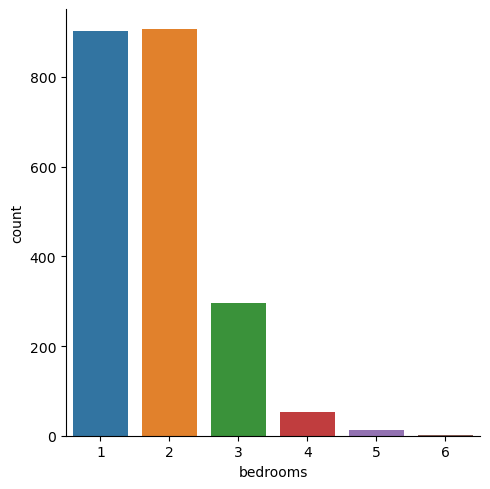

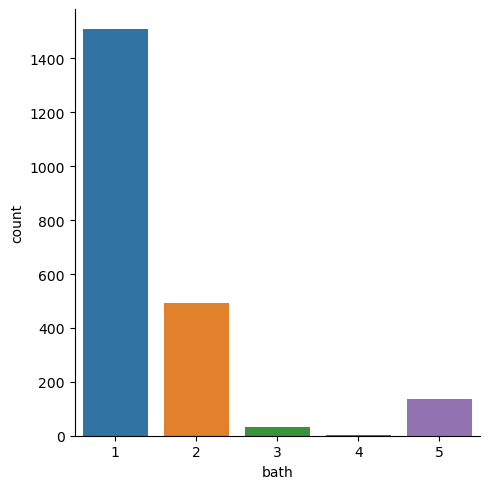

In [23]:
sns.catplot(x='bedrooms', kind='count', data=df)
sns.catplot(x='bath', kind='count', data=df)

### Task: Price vs. Number of Bedrooms, Number of Bathrooms, and Sqft
What are the mean and median prices of properties grouped by the number of bedrooms, and how do these statistics change when further grouped by the number of bathrooms?

In [24]:
## YOUR CODE HERE

We can also use boxplots to gain some further insights into the distributions of price, number of bedrooms, number of bathrooms, and sqft. See examples below:

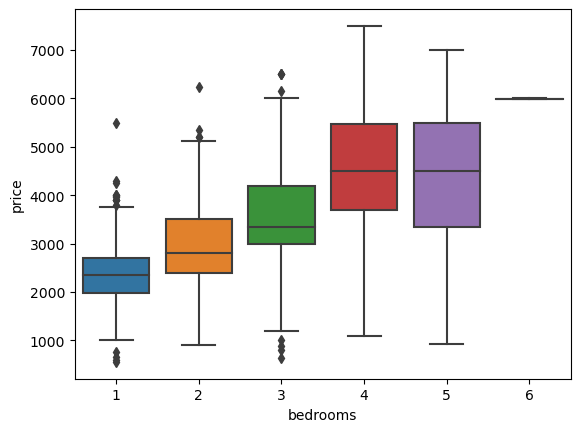

In [25]:
gr = sns.boxplot(x='bedrooms', y='price', data=df)


<AxesSubplot:xlabel='bath', ylabel='price'>

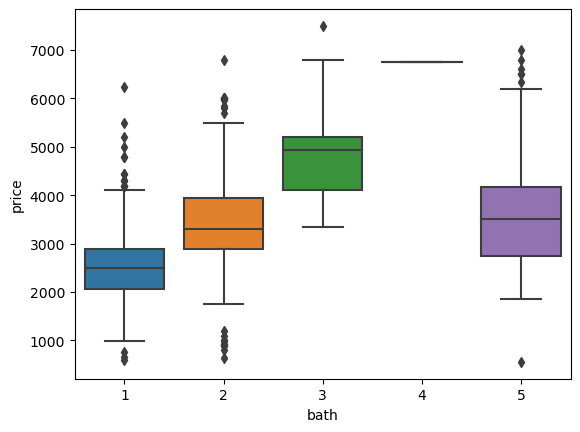

In [26]:
sns.boxplot(x='bath', y='price', data=df)

## Task: What is the distribution of square footage (sqft) for different numbers of bedrooms in the dataset?

In [27]:
## YOUR CODE HERE

## Task: What insights can be gained regarding the relationship between the number of bathrooms (bath) and the square footage (sqft) of the apartments in the dataset?

In [28]:
## YOUR CODE HERE

## Task: How would you visualize the relationship between 'sqft' and 'price' in the dataset?

In [29]:
## YOUR CODE HERE

## How can you modify previous plot to display the relationship between 'sqft' and 'price' using a logarithmic scale for both axes?

In [30]:
## YOUR CODE HERE

## Task: How can you visualize the relationship between 'sqft' and 'price', while also incorporating 'bedrooms' and 'bath' in the plot?

In [31]:
### YOUR CODE HERE

## Spatial Granularity: Location

## Task: What is the relationship between the longitude, price and the number of bedrooms in a property ?

In [32]:
## YOUR CODE HERE

## Task: What is the relationship between the latitude, price and the number of bedrooms in a property ?

In [33]:
## YOUR CODE HERE

## Temporal Granularity 

### Task: How many rental adds are posted every day, week and month? 

In [34]:
## YOUR CODE HERE

# Regular Expressions 
Regular Expressions play a significant role in EDA by providing a powerful tool for searching, manipulating, and analyzing text data

### Example: Extract Social Security Number 

In [35]:
import re 
pattern = r'[0-9]{8}-[0-9]{4}'
text = 'My social number is 20230918-1234'
matches = re.findall(pattern, text)
for match in matches:
    print(match)

20230918-1234


## Task: Write a function with a regex for validating a date with YYYY-MMM-DD format 

In [ ]:
def validate_date(date_string):
    pattern = "YOUR PATTERN HERE"
    if re.match(pattern, date_string):
        return True
    else:
        return False

In [ ]:
date_string = '2023-03-39'
print(validate_date(date_string))